In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\Zan\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
GOLD = wb.DataReader('GC=F', data_source='yahoo', start='2015-1-1')

#PG = wb.DataReader('GOLDAMGBD228NLBM', data_source='fred', start='2015-1-1')



In [3]:
GOLD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,1194.500000,1169.500000,1184.000000,1186.000000,92.0,1186.000000
2015-01-05,1206.900024,1180.099976,1180.300049,1203.900024,138.0,1203.900024
2015-01-06,1220.000000,1203.500000,1203.500000,1219.300049,470.0,1219.300049
2015-01-07,1219.199951,1210.599976,1219.199951,1210.599976,97.0,1210.599976
2015-01-08,1215.699951,1206.300049,1207.000000,1208.400024,29.0,1208.400024


In [4]:
GOLD.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-06,1742.599976,1626.500000,1641.900024,1730.699951,89924751.0,1730.699951
2020-04-07,1742.599976,1672.000000,1707.099976,1693.900024,194263.0,1693.900024
2020-04-08,1695.800049,1662.500000,1683.099976,1680.699951,66999389.0,1680.699951
2020-04-09,1754.500000,1682.400024,1684.300049,1740.599976,90794733.0,1740.599976
2020-04-09,1732.500000,1662.699951,1662.699951,1740.599976,825.0,1740.599976


## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
GOLD['simple_return'] = (GOLD['Adj Close'] / GOLD['Adj Close'].shift(1)) - 1
print (GOLD['simple_return'])

Date
2015-01-02         NaN
2015-01-05    0.015093
2015-01-06    0.012792
2015-01-07   -0.007135
2015-01-08   -0.001817
                ...   
2020-04-06    0.049672
2020-04-07   -0.021263
2020-04-08   -0.007793
2020-04-09    0.035640
2020-04-09    0.000000
Name: simple_return, Length: 1330, dtype: float64


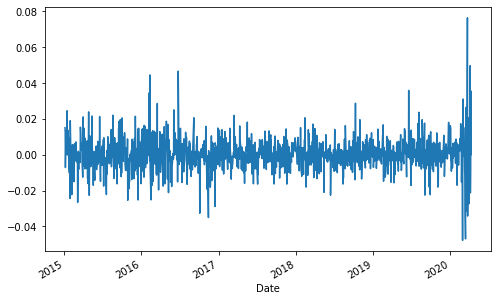

In [6]:
GOLD['simple_return'].plot(figsize=(8, 5))
plt.show()

Calculate the average daily return.

In [7]:
avg_returns_d = GOLD['simple_return'].mean()
avg_returns_d

0.00033020740888567467

Estimate the average annual return.

In [8]:
avg_returns_a = GOLD['simple_return'].mean() * 250
avg_returns_a

0.08255185222141867

In [9]:
print (str(round(avg_returns_a, 4) * 100) + ' %')

8.260000000000002 %


## Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [10]:
GOLD.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2015-01-02,1194.500000,1169.500000,1184.000000,1186.000000,92.0,1186.000000,NaN
2015-01-05,1206.900024,1180.099976,1180.300049,1203.900024,138.0,1203.900024,0.015093
2015-01-06,1220.000000,1203.500000,1203.500000,1219.300049,470.0,1219.300049,0.012792
2015-01-07,1219.199951,1210.599976,1219.199951,1210.599976,97.0,1210.599976,-0.007135
2015-01-08,1215.699951,1206.300049,1207.000000,1208.400024,29.0,1208.400024,-0.001817


In [11]:
GOLD['log_return'] = np.log(GOLD['Adj Close'] / GOLD['Adj Close'].shift(1))
print (GOLD['log_return'])

Date
2015-01-02         NaN
2015-01-05    0.014980
2015-01-06    0.012711
2015-01-07   -0.007161
2015-01-08   -0.001819
                ...   
2020-04-06    0.048478
2020-04-07   -0.021492
2020-04-08   -0.007823
2020-04-09    0.035020
2020-04-09    0.000000
Name: log_return, Length: 1330, dtype: float64


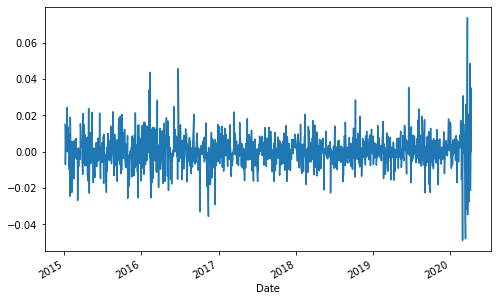

In [12]:
GOLD['log_return'].plot(figsize=(8, 5))
plt.show()

In [13]:
log_return_d = GOLD['log_return'].mean()
log_return_d

0.0002886708553585458

In [14]:
log_return_a = GOLD['log_return'].mean() * 250
log_return_a

0.07216771383963645

In [15]:
print (str(round(log_return_a, 5) * 100) + ' %')

7.217 %


## Calculating the Return of a Portfolio of Securities

In [16]:
tickers = ['VTI','VEA','VWO','VSS','GC=F']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']
    

In [17]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1327 entries, 2015-01-02 to 2020-04-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VTI     1327 non-null   float64
 1   VEA     1327 non-null   float64
 2   VWO     1327 non-null   float64
 3   VSS     1327 non-null   float64
 4   GC=F    1316 non-null   float64
dtypes: float64(5)
memory usage: 62.2 KB


In [18]:
mydata.head()

,VTI,VEA,VWO,VSS,GC=F
Date,,,,,
2015-01-02,95.734566,32.296322,34.334988,82.514427,1186.000000
2015-01-05,94.089577,31.576527,33.788197,81.354805,1203.900024
2015-01-06,93.167686,31.225206,33.623295,80.524055,1219.300049
2015-01-07,94.279396,31.559397,34.395744,81.242310,1210.599976
2015-01-08,95.942467,32.039257,34.977257,81.778862,1208.400024


In [19]:
mydata.tail()

,VTI,VEA,VWO,VSS,GC=F
Date,,,,,
2020-04-03,123.379997,31.830000,32.669998,74.550003,1648.800049
2020-04-06,132.009995,33.540001,34.279999,78.580002,1730.699951
2020-04-07,132.160004,33.730000,34.480000,79.839996,1693.900024
2020-04-08,136.800003,34.049999,34.880001,81.239998,1680.699951
2020-04-09,139.360001,34.779999,34.820000,83.139999,1740.599976


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [20]:
mydata.iloc[0]

VTI       95.734566
VEA       32.296322
VWO       34.334988
VSS       82.514427
GC=F    1186.000000
Name: 2015-01-02 00:00:00, dtype: float64

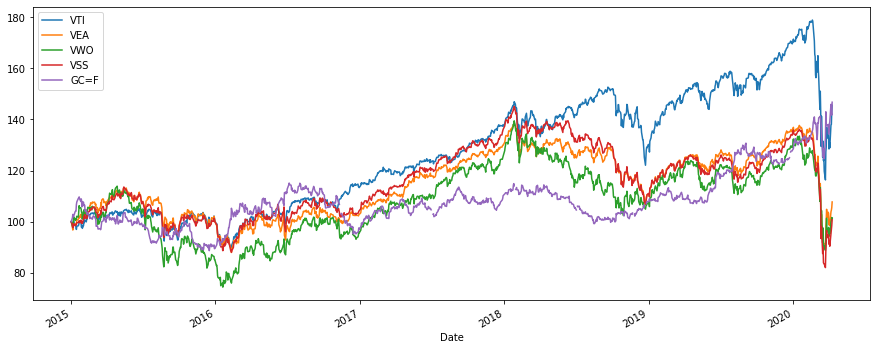

In [21]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [22]:
mydata.loc['2016-03-03']

VTI       93.768707
VEA       30.911325
VWO       29.221579
VSS       80.080803
GC=F    1257.400024
Name: 2016-03-03 00:00:00, dtype: float64

In [23]:
mydata.iloc[0]

VTI       95.734566
VEA       32.296322
VWO       34.334988
VSS       82.514427
GC=F    1186.000000
Name: 2015-01-02 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [24]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,VTI,VEA,VWO,VSS,GC=F
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.017183,-0.022287,-0.015925,-0.014054,0.015093
2015-01-06,-0.009798,-0.011126,-0.004880,-0.010211,0.012792
2015-01-07,0.011932,0.010703,0.022974,0.008920,-0.007135
2015-01-08,0.017640,0.015205,0.016907,0.006604,-0.001817


In [25]:
weights = np.array([0.50, 0.20, 0.10, 0.10, 0.10])

In [26]:
np.dot(returns, weights)

array([        nan, -0.01453745, -0.00735421, ...,  0.00176172,
        0.02158623,  0.01937525])

In [27]:
annual_returns = returns.mean() * 250
annual_returns

VTI     0.087534
VEA     0.030100
VWO     0.025382
VSS     0.016770
GC=F    0.087587
dtype: float64

In [28]:
np.dot(annual_returns, weights)

0.0627609051726226

In [29]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

6.276 %


## Calculating the Return of Indices 

In [30]:
tickers = ['^GSPC', '^IXIC', '^GDAXI','^DJI','^GDAXI','^N225','^SSEC','MSCI'] #'^FTSE' -london

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [31]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI,^N225,^SSEC,MSCI
Date,,,,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234,NaN,NaN,NaN
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844,NaN,NaN,NaN
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176,19446.000000,NaN,NaN
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156,18896.189453,NaN,NaN
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980,18680.380859,NaN,NaN


In [32]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^DJI,^N225,^SSEC,MSCI
Date,,,,,,,
2020-04-03,2488.649902,7373.080078,9525.769531,21052.529297,17820.189453,NaN,270.609985
2020-04-06,2663.679932,7913.240234,10075.169922,22679.990234,18576.300781,NaN,302.489990
2020-04-07,2659.409912,7887.259766,10356.700195,22653.859375,18950.179688,NaN,286.079987
2020-04-08,2749.979980,8090.899902,10332.889648,23433.570312,19353.240234,NaN,297.179993
2020-04-09,2789.820068,8153.580078,10564.740234,23719.369141,19345.769531,NaN,310.690002


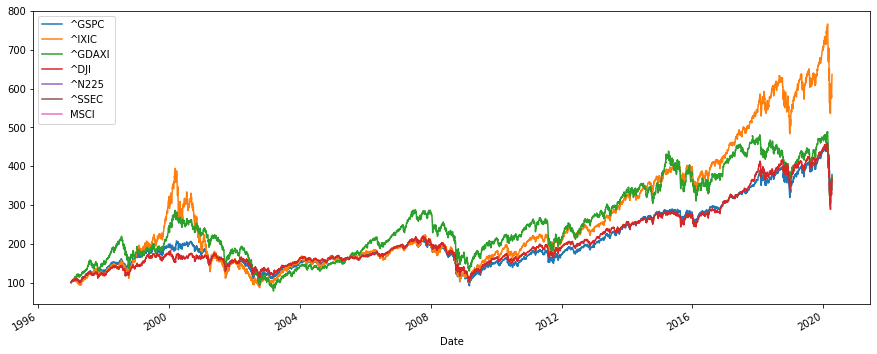

In [33]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

In [34]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI,^N225,^SSEC,MSCI
Date,,,,,,,
2020-04-03,-0.015137,-0.015256,-0.004707,-0.016854,0.000082,NaN,-0.057075
2020-04-06,0.070331,0.073261,0.057675,0.077305,0.042430,NaN,0.117808
2020-04-07,-0.001603,-0.003283,0.027943,-0.001152,0.020127,NaN,-0.054250
2020-04-08,0.034056,0.025819,-0.002299,0.034418,0.021269,NaN,0.038800
2020-04-09,0.014487,0.007747,0.022438,0.012196,-0.000386,NaN,0.045461


In [35]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.076207
^IXIC     0.110896
^GDAXI    0.069611
^DJI      0.073506
^N225    -0.012163
^SSEC     0.065951
MSCI      0.272912
dtype: float64

In [36]:
tickers = ['VTI', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2008-1-1')['Adj Close']    

In [37]:
data_2.tail()

,VTI,^GSPC,^DJI
Date,,,
2020-04-03,123.379997,2488.649902,21052.529297
2020-04-06,132.009995,2663.679932,22679.990234
2020-04-07,132.160004,2659.409912,22653.859375
2020-04-08,136.800003,2749.979980,23433.570312
2020-04-09,139.360001,2789.820068,23719.369141


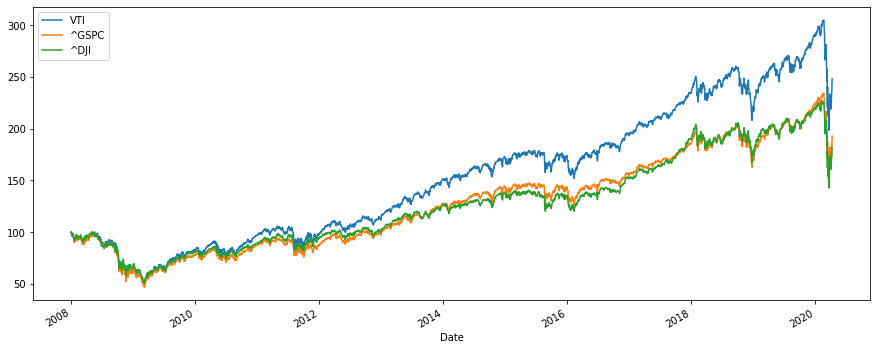

In [38]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

## Calculating the Risk of a Security

In [39]:
tickers = ['VTI', 'GC=F']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [40]:
sec_data.tail()

,VTI,GC=F
Date,,
2020-04-03,123.379997,1648.800049
2020-04-06,132.009995,1730.699951
2020-04-07,132.160004,1693.900024
2020-04-08,136.800003,1680.699951
2020-04-09,139.360001,1740.599976


In [41]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [42]:
sec_returns

,VTI,GC=F
Date,,
2007-01-03,NaN,NaN
2007-01-04,0.001999,-0.005116
2007-01-05,-0.007947,-0.030927
2007-01-08,0.003659,0.004289
2007-01-09,0.000000,0.009176
...,...,...
2020-04-03,-0.017196,0.006755
2020-04-06,0.067609,0.048478
2020-04-07,0.001136,-0.021492


## VTI

In [43]:
sec_returns['VTI'].mean()

0.00028453711503541974

In [44]:
sec_returns['VTI'].mean() * 250

0.07113427875885493

In [45]:
sec_returns['VTI'].std()

0.013100771684469846

In [46]:
sec_returns['VTI'].std() * 250 ** 0.5

0.2071413881438273

## GOLD

In [47]:
sec_returns['GC=F'].mean()

0.0002998437981752895

In [51]:
sec_returns['GC=F'].mean() * 250

0.07496094954382237

In [52]:
sec_returns['GC=F'].std()

0.011504998011601509

In [53]:
sec_returns['GC=F'].std() * 250 ** 0.5

0.18190999096184537

In [54]:
print (sec_returns['VTI'].mean() * 250)
print (sec_returns['GC=F'].mean() * 250)

0.07113427875885493
0.07496094954382237


In [56]:
sec_returns[['VTI', 'GC=F']].mean() * 250

VTI     0.071134
GC=F    0.074961
dtype: float64

In [57]:
sec_returns[['VTI', 'GC=F']].std() * 250 ** 0.5

VTI     0.207141
GC=F    0.181910
dtype: float64

## Calculating Covariance and Correlation 

\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [58]:
VTI_var = sec_returns['VTI'].var() 
VTI_var

0.00017163021872860688

In [76]:
GOLD_var = sec_returns['GC=F'].var() 
GOLD_var

0.00013236497924695465

In [77]:
VTI_var = sec_returns['VTI'].var() * 250
VTI_var

0.04290755468215172

In [78]:
GOLD_var = sec_returns['GC=F'].var() * 250
GOLD_var

0.03309124481173866

In [79]:
cov_matrix = sec_returns.cov()
cov_matrix

,VTI,GC=F
VTI,1.716302e-04,-2.791332e-08
GC=F,-2.791332e-08,1.323650e-04


In [63]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,VTI,GC=F
VTI,0.042908,-0.000007
GC=F,-0.000007,0.033091


In [64]:
corr_matrix = sec_returns.corr()
corr_matrix

,VTI,GC=F
VTI,1.000000,-0.000186
GC=F,-0.000186,1.000000


## Calculating Portfolio Risk

In [65]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [66]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.018996210707989868

Portfolio Volatility:

In [68]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.13782674162871975

In [69]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

13.783000000000001 %


## Idiosyncratic Risk & Systematic
## Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

In [70]:
weights = np.array([0.5, 0.5])

In [71]:
weights[0]

0.5

In [72]:
weights[1]

0.5

Diversifiable Risk:

In [86]:
VTI_var_a = sec_returns['VTI'].var() * 250
VTI_var_a

0.04290755468215172

In [87]:
GOLD_var_a = sec_returns['GC=F'].var() * 250
GOLD_var_a

0.03309124481173866

In [88]:
dr = pfolio_var - (weights[0] ** 2 * VTI_var_a) - (weights[1] ** 2 * GOLD_var_a)
dr

-3.489165482727097e-06

In [89]:
print (str(round(dr*100, 3)) + ' %')

-0.0 %


Non-Diversifiable Risk:

In [90]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.018999699873472595

In [92]:
n_dr_2 = (weights[0] ** 2 * VTI_var_a) + (weights[1] ** 2 * GOLD_var_a)
n_dr_2

0.018999699873472595

In [93]:
n_dr_1 == n_dr_2

True

https://www.youtube.com/watch?v=PYUYg9xKYD0

## OLS Regressions

In [94]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm 

import matplotlib.pyplot as plt

In [95]:
data = pd.read_excel('Housing.xlsx')

In [96]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [97]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [98]:
X = data['House Size (sq.ft.)']
Y = data['House Price']

In [99]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [100]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

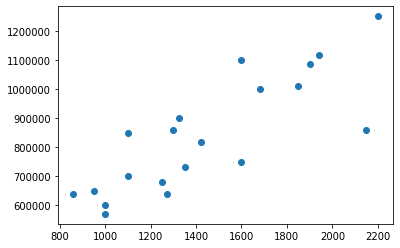

In [101]:
plt.scatter(X,Y)
plt.show()

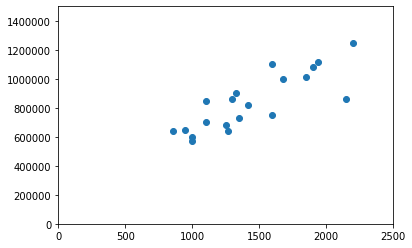

In [102]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

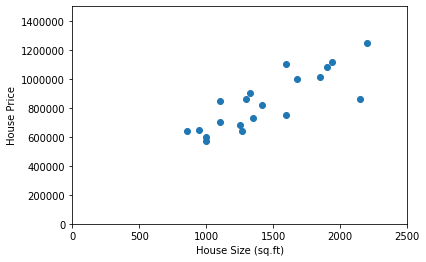

In [103]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('House Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

In [104]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y, X1).fit()

In [105]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           8.13e-06
Time:                        09:26:22   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Expected value of Y:

In [106]:
260800 + 402 * 1000

662800

### Alpha, Beta, R^2:

In [107]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [108]:
slope

401.91628631922595

In [109]:
intercept

260806.2360560964

In [110]:
r_value

0.8235775534696924

In [111]:
p_value

8.129642377231308e-06

In [112]:
std_err

65.24299510636492

https://en.wikipedia.org/wiki/Coefficient_of_determination

## Markowitz Portfolio Theory - Efficient frontier calculation

In [113]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
assets = ['VTI', 'BRK-A']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [157]:
pf_data.tail()

,VTI,BRK-A
Date,,
2020-04-03,123.379997,267954
2020-04-06,132.009995,277260
2020-04-07,132.160004,276700
2020-04-08,136.800003,286999
2020-04-09,139.360001,290500


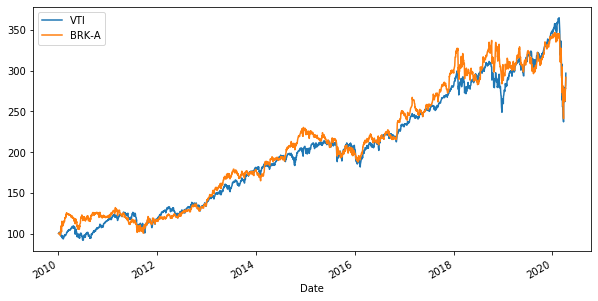

In [158]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [159]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [160]:
log_returns.mean() * 250

VTI      0.105221
BRK-A    0.103564
dtype: float64

In [161]:
log_returns.cov() * 250

,VTI,BRK-A
VTI,0.030308,0.026174
BRK-A,0.026174,0.036042


In [162]:
log_returns.corr()

,VTI,BRK-A
VTI,1.00000,0.79193
BRK-A,0.79193,1.00000


In [163]:
num_assets = len(assets)

In [164]:
num_assets

2

In [165]:
arr = np.random.random(2)
arr

array([0.28079701, 0.04037097])

In [166]:
arr[0] + arr[1]

0.32116797866070845

In [167]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.78128633, 0.21871367])

In [168]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [169]:
np.sum(weights * log_returns.mean()) * 250

0.1048586594092888

Expected Portfolio Variance:

In [170]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.029169826759799445

Expected Portfolio Volatility:

In [171]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.17079176432076415

In [172]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10457933951773006,
  0.10400985952841935,
  0.104079521314232,
  0.10443710056867328,
  0.10371116494672468,
  0.10395438742045938,
  0.10436111615995207,
  0.10430773748434574,
  0.10474062115691804,
  0.10449802361621324,
  0.1049027541440857,
  0.10428978224225158,
  0.10440027127009191,
  0.10411958664981658,
  0.10468289601758522,
  0.10410563432941314,
  0.10437804307876193,
  0.10409283203272802,
  0.1044160756982473,
  0.10417662946676241,
  0.10405012021949289,
  0.10396182697857638,
  0.10452396502639945,
  0.10465001405884757,
  0.10423684432875904,
  0.10465454835998372,
  0.10486879170520887,
  0.10415825303396192,
  0.10431519981250262,
  0.10479260193696342,
  0.10464236629895257,
  0.10430612423336592,
  0.10410299882767618,
  0.10433808488644096,
  0.10468012815012778,
  0.10456647131458514,
  0.10481588666453008,
  0.10504676033879262,
  0.10461955865594505,
  0.10394936234821921,
  0.10368024272322028,
  0.10457847492399618,
  0.10458344901772682,
  0.10378635997

In [173]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10432483, 0.10432071, 0.10360159, 0.10501795, 0.10444026,
        0.10457562, 0.10417807, 0.10450305, 0.10507342, 0.10472732,
        0.104366  , 0.10513154, 0.1042763 , 0.10372643, 0.10433809,
        0.1038026 , 0.10503066, 0.1045037 , 0.10466343, 0.10437323,
        0.10419433, 0.10457337, 0.10454983, 0.10405891, 0.10438981,
        0.10442261, 0.10480449, 0.10458579, 0.10390435, 0.10447695,
        0.10406967, 0.10478583, 0.1050092 , 0.10422938, 0.10378055,
        0.10410031, 0.10406565, 0.10486569, 0.10415761, 0.10404104,
        0.10507054, 0.10515176, 0.10400599, 0.10444051, 0.10417888,
        0.10399348, 0.10409251, 0.10440074, 0.10435687, 0.10444582,
        0.10445073, 0.10498983, 0.10384523, 0.10409345, 0.10448649,
        0.10453644, 0.10411945, 0.10512301, 0.10460179, 0.10517266,
        0.10369356, 0.10445468, 0.10494113, 0.10434939, 0.10393106,
        0.10425277, 0.10411924, 0.10497409, 0.10374401, 0.10379457,
        0.10435564, 0.10421437, 0.10423169, 0.10

In [174]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [175]:
portfolios.head()

,Return,Volatility
0,0.104325,0.173012
1,0.104321,0.173061
2,0.103602,0.188695
3,0.105018,0.171771
4,0.104440,0.171818


In [176]:
portfolios.tail()

,Return,Volatility
995,0.103614,0.188308
996,0.103616,0.188259
997,0.104397,0.172218
998,0.104363,0.172576
999,0.104797,0.170614


Text(0, 0.5, 'Expected Return')

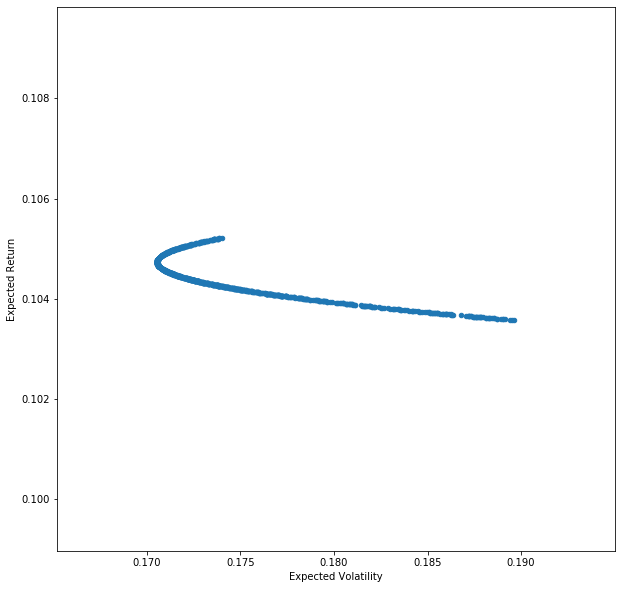

In [181]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## CAPM

In [199]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

tickers = ['TSLA', '^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close']   

In [200]:
sec_returns = np.log( data / data.shift(1) )

In [209]:
cov = sec_returns.cov() * 250
cov

,TSLA,^GSPC
TSLA,0.250695,0.022659
^GSPC,0.022659,0.016362


In [210]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.02265914280350725

In [211]:
market_var = sec_returns['^GSPC'].var() * 250
market_var

0.016361631002308474

**Beta:**
### $$ 
\beta_{tsla} = \frac{\sigma_{tsla,m}}{\sigma_{m}^2}
$$

In [212]:
TSLA_beta = cov_with_market / market_var
TSLA_beta

1.3848951122482995

**Calculate the expected return of P&G (CAPM):**
### $$
\overline{r_{tsla}} = r_f + \beta_{tsla}(\overline{r_{m}} - r_f) 
$$

In [214]:
TSLA_er = 0.025 + TSLA_beta * 0.05
TSLA_er

0.094244755612415

## Estimating the Sharpe Ratio

**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{tsla}} - r_f}{\sigma_{tsla}}
$$

In [225]:
Sharpe = (TSLA_er - 0.025) / (sec_returns['TSLA'].std() * 250 ** 0.5)
Sharpe

0.1382975072384351

## Multivariate Regression

In [230]:
data = pd.read_excel('Housing.xlsx')

In [231]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


Independent Variables: *"House Size (sq.ft.)", "Number of Rooms", "Year of Construction"*

In [232]:
X = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
Y = data['House Price']

In [235]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           6.82e-05
Time:                        13:43:13   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: *"House Size (sq.ft.)", "Number of Rooms"*

In [236]:
X = data[['House Size (sq.ft.)', 'Number of Rooms']]
Y = data['House Price']

In [237]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           5.77e-05
Time:                        13:43:57   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: *"House Size (sq.ft.)", "Year of Construction"*

In [238]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
Y = data['House Price']

In [239]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.26e-05
Time:                        13:46:31   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: *"Number of Rooms", "Year of Construction"*

In [240]:
X = data[['Number of Rooms', 'Year of Construction']]
Y = data['House Price']

In [241]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           6.79e-05
Time:                        13:46:59   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Monte Carlo Simulation

In [242]:
rev_m = 170
rev_stdev = 20
iterations = 1000

In [243]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([164.54815125, 176.47413619, 186.30151937, 166.56243303,
       153.45069061, 171.78134418, 170.00738782, 170.4858609 ,
       191.16199058, 179.78884518, 165.47342983, 174.09127109,
       174.20793135, 181.97403345, 177.32112208, 163.64571105,
       167.97786496, 150.68038763, 166.91702462, 180.22368131,
       172.14191263, 173.24135126, 188.45104499, 144.11993568,
       184.9863302 , 191.68190848, 174.69914831, 168.94668311,
       183.75990655, 201.03469839, 213.18267616, 155.40389435,
       133.28675063, 165.18977424, 172.35672327, 156.84230808,
       147.75469409, 175.69217798, 173.37739324, 175.32393354,
       165.26901849, 167.64366739, 161.68779259, 169.15080097,
       182.01954866, 158.97497333, 168.87321121, 183.36828691,
       167.77076993, 127.09568474, 166.5395581 , 171.52352759,
       178.59867572, 152.48299495, 130.52381864, 163.82054573,
       160.86084566, 204.72192115, 145.27405241, 138.32613514,
       175.28607857, 185.66207449, 167.7024402 , 188.21

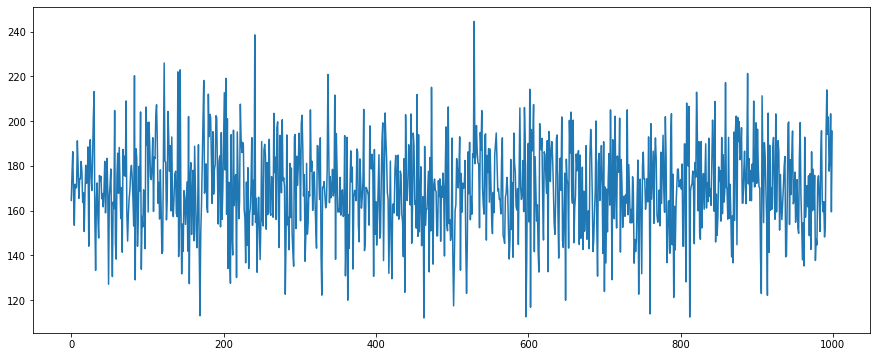

In [244]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

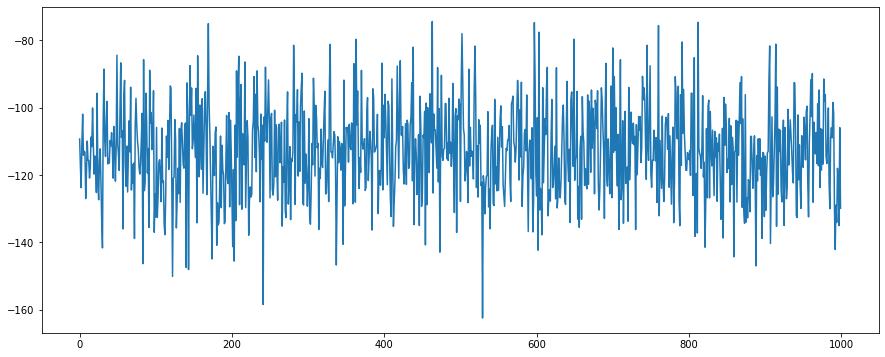

In [245]:
COGS = - (rev * np.random.normal(0.6,0.1))
 
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()

In [246]:
COGS.mean()

-112.9400657122552

In [247]:
COGS.std()

13.491257496165693

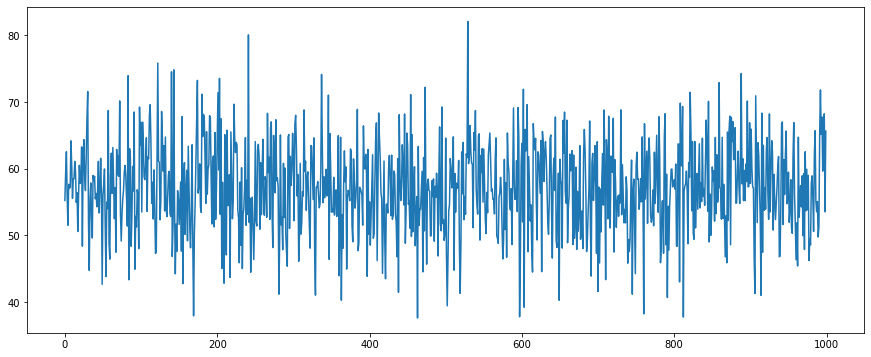

In [248]:
Gross_Profit = rev + COGS
Gross_Profit


plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [249]:
max(Gross_Profit)

82.07431817006616

In [250]:
min(Gross_Profit)

37.61184754795623

In [251]:
Gross_Profit.mean()

57.0731686016631

In [252]:
Gross_Profit.std()

6.81767633896076

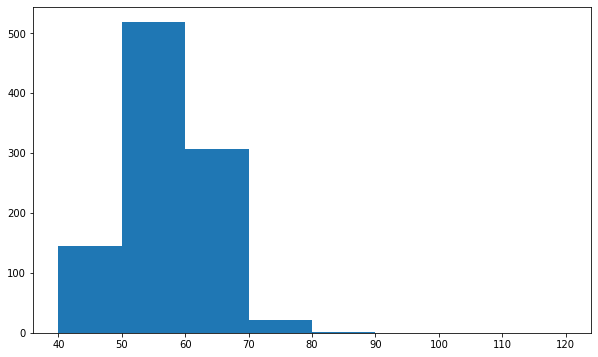

In [253]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

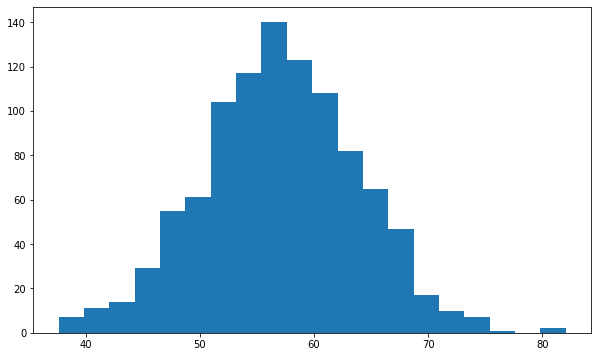

In [254]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

## MC Predicting Stock Prices & Brownian Motion

In [255]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [256]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [257]:
log_returns = np.log(1 + data.pct_change())

In [258]:
log_returns.tail()

,PG
Date,
2020-04-03,0.005926
2020-04-06,0.023446
2020-04-07,-0.043723
2020-04-08,0.020451
2020-04-09,-0.003830


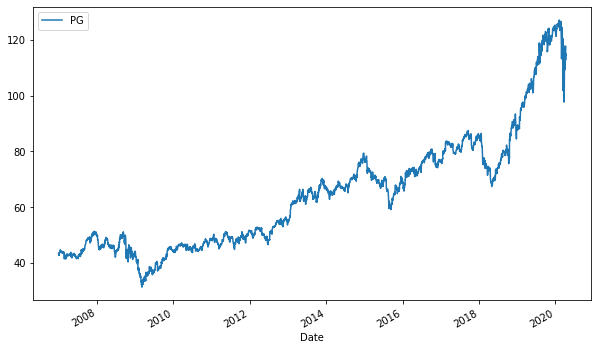

In [259]:
data.plot(figsize=(10, 6));

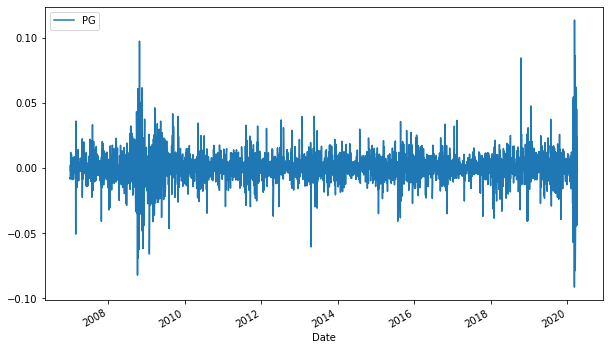

In [260]:
log_returns.plot(figsize = (10, 6))

In [261]:
u = log_returns.mean()
u

PG    0.000291
dtype: float64

In [262]:
var = log_returns.var()
var

PG    0.000142
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [263]:
drift = u - (0.5 * var)
drift

PG    0.00022
dtype: float64

In [264]:
stdev = log_returns.std()
stdev

PG    0.01192
dtype: float64

In [265]:
type(drift)

pandas.core.series.Series

In [266]:
type(stdev)

pandas.core.series.Series

In [267]:
np.array(drift)

array([0.00021958])

In [268]:
drift.values

array([0.00021958])

In [269]:
stdev.values

array([0.0119203])

In [270]:
norm.ppf(0.95)

1.6448536269514722

In [271]:
x = np.random.rand(10, 2)
x

array([[0.1375751 , 0.46292836],
       [0.430324  , 0.9760298 ],
       [0.98727135, 0.00250465],
       [0.34220172, 0.40449341],
       [0.963893  , 0.57051898],
       [0.44627434, 0.09332018],
       [0.70434923, 0.33651205],
       [0.54956477, 0.35653023],
       [0.27293474, 0.53727436],
       [0.66401386, 0.27972209]])

In [272]:
norm.ppf(x)

array([[-1.09127884, -0.09305897],
       [-0.17554935,  1.97789643],
       [ 2.23439185, -2.80643525],
       [-0.40646164, -0.2417333 ],
       [ 1.79776667,  0.17769561],
       [-0.13507992, -1.32058325],
       [ 0.53695088, -0.42200125],
       [ 0.12456182, -0.36774893],
       [-0.60396114,  0.09356932],
       [ 0.42344272, -0.58366729]])

In [273]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.19959838,  1.78979007],
       [-1.21402042,  0.06405186],
       [-0.50244386, -0.5952714 ],
       [-0.43691127, -1.64397146],
       [ 0.20683406, -0.73431765],
       [-0.63585919, -0.96992744],
       [ 0.04000349, -0.57707724],
       [-0.62911715,  0.03992571],
       [-0.03746692,  0.48988376],
       [ 1.06399914,  1.67100139]])

In [274]:
t_intervals = 1000
iterations = 10

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [275]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [276]:
daily_returns

array([[0.98699142, 0.98870497, 1.00661007, ..., 1.01655698, 1.00847527,
        0.99453275],
       [1.00163016, 0.99348335, 1.00934971, ..., 0.99353772, 0.97739083,
        0.97329733],
       [1.01798217, 0.9871033 , 1.0177362 , ..., 0.98664163, 0.99853658,
        0.97826961],
       ...,
       [1.01535531, 1.0210893 , 0.99212444, ..., 1.00453448, 0.9908323 ,
        1.00511569],
       [0.98633976, 0.99179083, 0.99309244, ..., 0.99150482, 0.98865324,
        0.99701078],
       [1.01632762, 0.98614057, 1.00197534, ..., 1.02098608, 0.99164934,
        0.98751188]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [277]:
S0 = data.iloc[-1]
S0

PG    114.660004
Name: 2020-04-09 00:00:00, dtype: float64

In [278]:
price_list = np.zeros_like(daily_returns)

In [279]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [280]:
price_list[0] = S0
price_list

array([[114.66000366, 114.66000366, 114.66000366, ..., 114.66000366,
        114.66000366, 114.66000366],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [281]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [282]:
price_list

array([[114.66000366, 114.66000366, 114.66000366, ..., 114.66000366,
        114.66000366, 114.66000366],
       [114.84691739, 113.91280463, 115.73204088, ..., 113.91903916,
        112.06763591, 111.59827514],
       [116.91211374, 112.44370487, 117.78468781, ..., 112.39726604,
        111.90363394, 109.1732007 ],
       ...,
       [142.90366734, 120.41782062,  93.93653601, ..., 133.26179179,
         88.12750197, 155.7404691 ],
       [140.95156964, 119.42929028,  93.28766351, ..., 132.12970861,
         87.12754071, 155.27492732],
       [143.25297323, 117.77406802,  93.47193813, ..., 134.90259347,
         86.39996861, 153.33583548]])

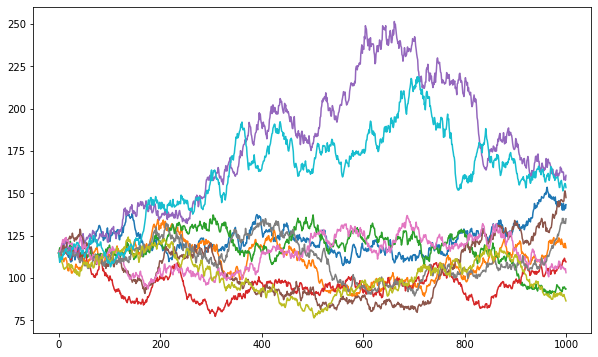

In [283]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

## DERIVATIVES

https://www.youtube.com/watch?v=pr-u4LCFYEY

In [285]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

$$
d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

$$
d_2 = d_1 - s \cdot \sqrt{t} = \frac{\ln(\frac{S}{K}) + (r - \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

In [286]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))
 
def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [287]:
norm.cdf(0)

0.5

In [288]:
norm.cdf(0.25)

0.5987063256829237

In [289]:
norm.cdf(0.75)

0.7733726476231317

In [303]:
norm.cdf(9)

1.0

$$
\textbf{C} = SN(d_1) - Ke^{-rt}N(d_2) 
$$

In [292]:
def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [297]:
ticker = 'PG'  
data = pd.DataFrame()  
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [304]:
S = data.iloc[-1]
S

PG    83.241959
Name: 2017-03-21 00:00:00, dtype: float64

In [299]:
log_returns = np.log(1 + data.pct_change())

In [307]:
# here we assume it is normaly distributed - profesionals will use interpolation of the returns to figure out the distribution


In [300]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [305]:
r = 0.025
K = 110.0
T = 1

In [306]:
d1(S, K, r, stdev, T)

PG   -1.34887
dtype: float64

In [308]:
d2(S, K, r, stdev, T)

PG   -1.525421
dtype: float64

In [309]:
BSM(S, K, r, stdev, T)

PG    0.561863
Name: 2017-03-21 00:00:00, dtype: float64

In [310]:
# price of the option is 0.561863

### MC - Euler Discretization 

In [311]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [312]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [313]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [315]:
r = 0.025

In [316]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [317]:
type(stdev)

pandas.core.series.Series

In [318]:
stdev = stdev.values
stdev

array([0.17655053])

In [319]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [320]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [322]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [323]:
S

array([[ 83.24195862,  83.24195862,  83.24195862, ...,  83.24195862,
         83.24195862,  83.24195862],
       [ 83.71243441,  82.29331772,  83.95308934, ...,  83.78023524,
         81.57745225,  83.80643397],
       [ 84.43610267,  81.47571657,  83.75680009, ...,  83.04761892,
         81.25833999,  82.36981902],
       ...,
       [ 86.60225449, 100.06963399,  68.63324307, ...,  90.7502296 ,
         96.80283969,  92.28637533],
       [ 87.19276807, 100.96903432,  67.7650024 , ...,  87.72116885,
         97.17129024,  93.0381077 ],
       [ 87.78630569,  99.45532739,  68.43868357, ...,  89.64782273,
         97.2162677 ,  92.40597104]])

In [324]:
S.shape

(251, 10000)

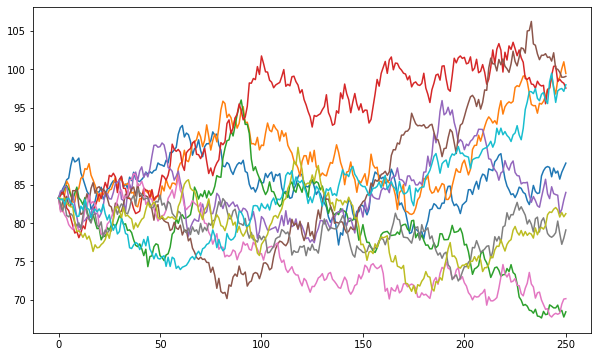

In [325]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [326]:
p = np.maximum(S[-1] - 110, 0)

In [327]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [328]:
p.shape

(10000,)

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [329]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.5167316549227989